在图像处理中，直方图是非常重要的,也是非常有用的一个处理要素。

在 skimage 库中对直方图的处理，是放在 exposure 这个模块中。

### 一、计算直方图

函数：**skimage.exposure.histogram(image,nbins=256) **

在 numpy 包中，也提供了一个计算直方图的函数 histogram() ,两者大同小异。

返回一个 tuple(hist,bins_center),前一个数组是直方图的统计量，后一个数组是每个 bin 的中间值。

In [2]:
import numpy as np
from skimage import exposure,data
image=data.camera()*1.0
hist1=np.histogram(image,bins=2)  #用numpy包计算直方图
hist2=exposure.histogram(image,nbins=2)  #用skimage计算直方图
print(hist1)
print(hist2)

(array([107432, 154712]), array([   0. ,  127.5,  255. ]))
(array([107432, 154712]), array([  63.75,  191.25]))


分成两个 bin，每个bin的统计量是一样的，但是 numpy 返回的是每个 bin 的两端的范围值，而 skimage 返回的是每个 bin 的中间值

### 二、绘制直方图

绘图都可以调用 matplotlib.pyplot 库来进行，其中的 hist 函数可以直接绘制直方图。

调用方式：

**n,bins,patches = plt.hist ( arr, bins=10 , normed=0,  facecolor='black', edgecolor='black',alpha=1, histtype='bar'**

hist 的参数非常多，但常用的也就是6个，只有第一个是必选的，后面四个可选
- arr：需要计算直方图的一维数组
- bins：直方图的柱数，可选项，默认为10
- normed：是否将得到的直方图向量归一化，默认为10
- facecolor：直方图颜色
- edgecolor：直方图边框颜色
- alpha:透明度
- histtype：直方图类型，‘bar’，‘barstacked’，‘step’，‘stepfilled’

返回值：
- n：直方图向量，是否归一化由参数 normed 设定
- bins：返回各个 bin 的区间范围
- patches：返回每个 bin 里面包含的数据，是一个 list 

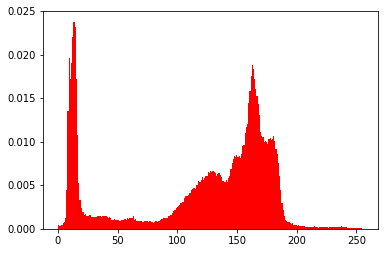

In [4]:
from skimage import data
import matplotlib.pyplot as plt
img=data.camera()
plt.figure("hist")
arr=img.flatten()
n,bins,patches=plt.hist(arr,bins=256,normed=1,edgecolor='None',facecolor='red')
plt.show()

其中的 flatten() 函数是 numpy 包里面的，用于将二维数组序列化成以为数组。

是按行序列，如：mat=[[1 2 3

                     4 5 6]]

经过 mat.flatten() 后，就变成了 mat=[1 2 3 4 5 6]

### 三、彩色图片三通道直方图

一般来说，直方图都是灰度图的，如果要画 rgb 图像的三通道直方图，实际上就是三个直方图的叠加。

/home/zhaozhao/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:3075: MatplotlibDeprecationWarning: The 'hold' keyword argument is deprecated since 2.0.
  mplDeprecation)


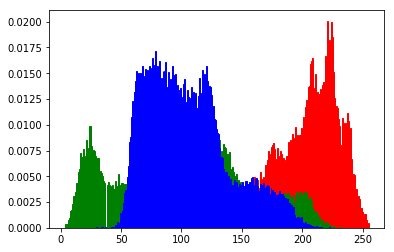

In [7]:
from skimage import io,data
import matplotlib.pyplot as plt
img=io.imread('images/lena.png')
ar=img[:,:,0].flatten()
plt.hist(ar,bins=256,normed=1,facecolor='r',edgecolor='r',hold=1) #hold=1 表示可以叠加
ag=img[:,:,1].flatten()
plt.hist(ag,bins=256,normed=1,facecolor='g',edgecolor='g',hold=1)
ab=img[:,:,2].flatten()
plt.hist(ab,bins=256,normed=1,facecolor='b',edgecolor='b')
plt.show()

### 四、直方图均衡化

如果一幅图像的像素占有很多的灰度级而且分布均匀，那么这样的图像往往有高对比度和多变的灰度色调。

直方图的均衡化就是一种能仅靠输入图像直方图信息自动达到这种效果的变换函数。

它的基本思想就是对图像中像素个数多的灰度级进行展宽，而对图像中像素个数少的灰度进行压缩，从而扩展取值的动态范围，提高了对比度和灰度色调的变化，使图像更加清晰。

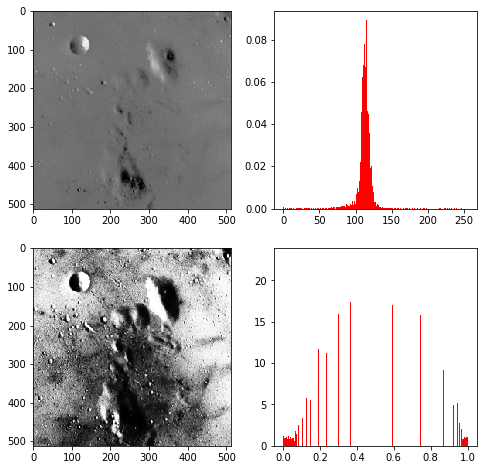

In [10]:
from skimage import data,exposure
import matplotlib.pyplot as plt
img=data.moon()
plt.figure("hist",figsize=(8,8))

arr=img.flatten()
plt.subplot(221)
plt.imshow(img,plt.cm.gray)  #原始图像
plt.subplot(222)
plt.hist(arr,bins=256,normed=1,edgecolor='None',facecolor='red')   #原始图像直方图

img1=exposure.equalize_hist(img)  #均衡化

arr1=img1.flatten()
plt.subplot(223)
plt.imshow(img1,plt.cm.gray)  #均衡化图像
plt.subplot(224)
plt.hist(arr1, bins=256, normed=1,edgecolor='None',facecolor='red') #均衡化直方图

plt.show()